# What neighborhood have the highest ratings?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
listings = pd.read_csv('listings.csv')
review = pd.read_csv('reviews.csv')

##### Data Exploration

In [4]:
review.describe(include='all')

,listing_id,id,date,reviewer_id,reviewer_name,comments
count,8.484900e+04,8.484900e+04,84849,8.484900e+04,84849,84831
unique,NaN,NaN,1930,NaN,14380,84136
top,NaN,NaN,2015-09-21,NaN,David,The host canceled this reservation the day bef...
freq,NaN,NaN,580,NaN,870,57
mean,3.005067e+06,3.058765e+07,NaN,1.701301e+07,NaN,NaN
std,2.472877e+06,1.636613e+07,NaN,1.353704e+07,NaN,NaN
min,4.291000e+03,3.721000e+03,NaN,1.500000e+01,NaN,NaN
25%,7.946330e+05,1.725127e+07,NaN,5.053141e+06,NaN,NaN
50%,2.488228e+06,3.228809e+07,NaN,1.413476e+07,NaN,NaN
75%,4.694479e+06,4.457648e+07,NaN,2.762402e+07,NaN,NaN


In [5]:
list(listings)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [8]:
N_info = listings[['neighborhood_overview','neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed','city','state','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']]

In [9]:
N_info.describe(include='all')

,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,2786,3402,3818,3818,3818,3818,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
unique,2506,81,87,17,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Wallingford is a mostly-residential neighborho...,Capitol Hill,Broadway,Other neighborhoods,Seattle,WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,17,351,397,794,3810,3817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,NaN,NaN,NaN,NaN,NaN,NaN,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000


2 states

In [10]:
N_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
neighborhood_overview           2786 non-null object
neighbourhood                   3402 non-null object
neighbourhood_cleansed          3818 non-null object
neighbourhood_group_cleansed    3818 non-null object
city                            3818 non-null object
state                           3818 non-null object
number_of_reviews               3818 non-null int64
review_scores_rating            3171 non-null float64
review_scores_accuracy          3160 non-null float64
review_scores_cleanliness       3165 non-null float64
review_scores_checkin           3160 non-null float64
review_scores_communication     3167 non-null float64
review_scores_location          3163 non-null float64
review_scores_value             3162 non-null float64
reviews_per_month               3191 non-null float64
dtypes: float64(8), int64(1), object(6)
memory usage: 447.5+ KB


In [11]:
N_info.city.value_counts()

Seattle                  3810
Seattle                     2
West Seattle                2
Phinney Ridge Seattle       1
西雅图                         1
Ballard, Seattle            1
seattle                     1
Name: city, dtype: int64

In [12]:
N_info.state.value_counts()

WA    3817
wa       1
Name: state, dtype: int64

In [13]:
N_info.review_scores_rating.value_counts()

100.0    781
98.0     292
96.0     278
97.0     266
95.0     260
94.0     198
93.0     184
99.0     146
90.0     138
80.0     111
92.0     105
91.0      97
87.0      55
89.0      53
88.0      47
85.0      24
84.0      23
86.0      17
83.0      13
60.0      12
82.0      10
70.0       8
73.0       7
76.0       5
72.0       4
78.0       4
77.0       4
40.0       4
75.0       3
71.0       3
81.0       3
68.0       2
74.0       2
67.0       2
79.0       2
66.0       2
64.0       1
20.0       1
53.0       1
65.0       1
55.0       1
57.0       1
Name: review_scores_rating, dtype: int64

##### the max rating is 100. Check if all max ratings belong to a single neighbourhood

In [14]:
max_ratings = N_info.loc[N_info.review_scores_rating==100.0]

In [15]:
max_ratings.neighbourhood.unique()

array(['Queen Anne', nan, 'Ballard', 'Lower Queen Anne', 'Wallingford',
       'Fremont', 'Green Lake', 'Westlake', 'Minor', 'Madrona',
       'University District', 'Roosevelt', 'Madison Park',
       'Harrison/Denny-Blaine', 'Capitol Hill', 'Leschi', 'Atlantic',
       'Pike Place Market', 'Eastlake', 'South Lake Union', 'Magnolia',
       'Belltown', 'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'The Junction', 'Genesee', 'North Beacon Hill', 'Greenwood',
       'Holly Park', 'Fauntleroy', 'High Point', 'Windermere',
       'View Ridge', 'Dunlap', 'Seward Park', 'Rainier Beach',
       'Columbia City', 'Mount Baker', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Victory Heights', 'Mathews Beach', 'Meadowbrook', 'Olympic Hills',
       'Wedgewood', 'North Beach/Blue Ridge', 'Ce

In [17]:
max_ratings.neighbourhood.value_counts()

Capitol Hill                 70
Minor                        52
Queen Anne                   46
Belltown                     36
Ballard                      33
Fremont                      30
Wallingford                  20
Lower Queen Anne             19
Stevens                      17
Magnolia                     16
Atlantic                     16
Greenwood                    15
North Beacon Hill            15
University District          15
Leschi                       15
Central Business District    14
Madrona                      13
First Hill                   13
Phinney Ridge                10
Genesee                      10
Maple Leaf                   10
Green Lake                   10
Mount Baker                  10
North Admiral                 9
Bryant                        9
Columbia City                 8
The Junction                  8
Ravenna                       8
Eastlake                      7
Roosevelt                     7
                             ..
Victory 

##### since several neighbourhood has a max rating of 100, lets include other factors

In [16]:
max_ratings

,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
13,Queen Anne hill became a popular spot for the ...,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,3,100.0,10.0,10.0,9.0,9.0,10.0,10.0,3.00
20,Lower Queen Anne is near the Seattle Center (s...,NaN,West Queen Anne,Queen Anne,Seattle,WA,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00
22,Queen Anne is a wonderful mix of beautiful tre...,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.86
24,NaN,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.18
25,Upper Queen Anne is a charming neighborhood fu...,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,8,100.0,10.0,10.0,9.0,10.0,10.0,10.0,1.30
28,Located in the beautiful neighborhood of Queen...,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,6,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2.47
38,The West slope of Queen Anne is conveniently l...,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.83
44,"Queen Anne is Seattle's prime neighborhood, si...",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,9,100.0,10.0,10.0,9.0,9.0,10.0,10.0,1.99
47,Queen Anne Hill is centrally located. A very ...,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.06
48,The top of Queen Anne hill is one of the oldes...,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,1,100.0,8.0,10.0,10.0,10.0,10.0,10.0,0.16


In [31]:
N_group = N_info.groupby(by='neighbourhood').agg({'review_scores_accuracy':'mean', 'review_scores_cleanliness': 'mean', 'review_scores_checkin': 'mean','review_scores_communication': 'mean','review_scores_location': 'mean','review_scores_rating': 'mean','review_scores_value': 'mean',})

In [32]:
N_group

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value
neighbourhood,,,,,,,
Alki,9.666667,9.733333,9.866667,9.933333,9.866667,95.933333,9.466667
Arbor Heights,9.666667,9.666667,10.000000,10.000000,8.666667,98.000000,9.333333
Atlantic,9.627907,9.627907,9.813953,9.767442,9.093023,95.325581,9.558140
Ballard,9.737705,9.666667,9.907104,9.918033,9.759563,95.382514,9.546448
Belltown,9.478022,9.543956,9.582418,9.686813,9.807692,93.340659,9.192308
Bitter Lake,9.500000,9.250000,9.833333,9.666667,9.333333,95.666667,9.583333
Brighton,10.000000,10.000000,10.000000,10.000000,9.000000,94.500000,9.750000
Broadview,9.733333,9.733333,9.800000,10.000000,9.333333,95.600000,9.533333
Broadway,9.250000,9.250000,10.000000,9.750000,9.500000,94.250000,9.000000


In [33]:
# find a common value for rating placement
N_group['total_score'] = N_group.sum(axis=1)

In [34]:
# sort base on common value 
N_group = N_group.sort_values(by='total_score', ascending=False)

In [35]:
N_group

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,total_score
neighbourhood,,,,,,,,
High Point,10.000000,10.000000,10.000000,10.000000,9.500000,97.750000,9.750000,157.000000
Harrison/Denny-Blaine,9.909091,9.727273,10.000000,10.000000,9.727273,97.181818,9.727273,156.272727
Yesler Terrace,9.909091,9.363636,10.000000,10.000000,9.545455,97.454545,9.818182,156.090909
Gatewood,9.769231,9.846154,10.000000,9.923077,9.923077,96.769231,9.846154,156.076923
Windermere,9.857143,9.571429,9.857143,9.714286,9.857143,97.500000,9.714286,156.071429
Madrona,9.818182,9.787879,9.818182,9.878788,9.787879,97.151515,9.818182,156.060606
Laurelhurst,10.000000,10.000000,10.000000,10.000000,9.875000,96.375000,9.750000,156.000000
Genesee,9.807692,9.807692,9.961538,9.923077,9.884615,96.846154,9.769231,156.000000
Montlake,9.750000,9.812500,9.875000,9.812500,9.750000,96.812500,9.687500,155.500000


In [36]:
N_plot = N_group[0:10]

In [37]:
N_plot

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,total_score
neighbourhood,,,,,,,,
High Point,10.000000,10.000000,10.000000,10.000000,9.500000,97.750000,9.750000,157.000000
Harrison/Denny-Blaine,9.909091,9.727273,10.000000,10.000000,9.727273,97.181818,9.727273,156.272727
Yesler Terrace,9.909091,9.363636,10.000000,10.000000,9.545455,97.454545,9.818182,156.090909
Gatewood,9.769231,9.846154,10.000000,9.923077,9.923077,96.769231,9.846154,156.076923
Windermere,9.857143,9.571429,9.857143,9.714286,9.857143,97.500000,9.714286,156.071429
Madrona,9.818182,9.787879,9.818182,9.878788,9.787879,97.151515,9.818182,156.060606
Laurelhurst,10.000000,10.000000,10.000000,10.000000,9.875000,96.375000,9.750000,156.000000
Genesee,9.807692,9.807692,9.961538,9.923077,9.884615,96.846154,9.769231,156.000000
Montlake,9.750000,9.812500,9.875000,9.812500,9.750000,96.812500,9.687500,155.500000


### Result visualization

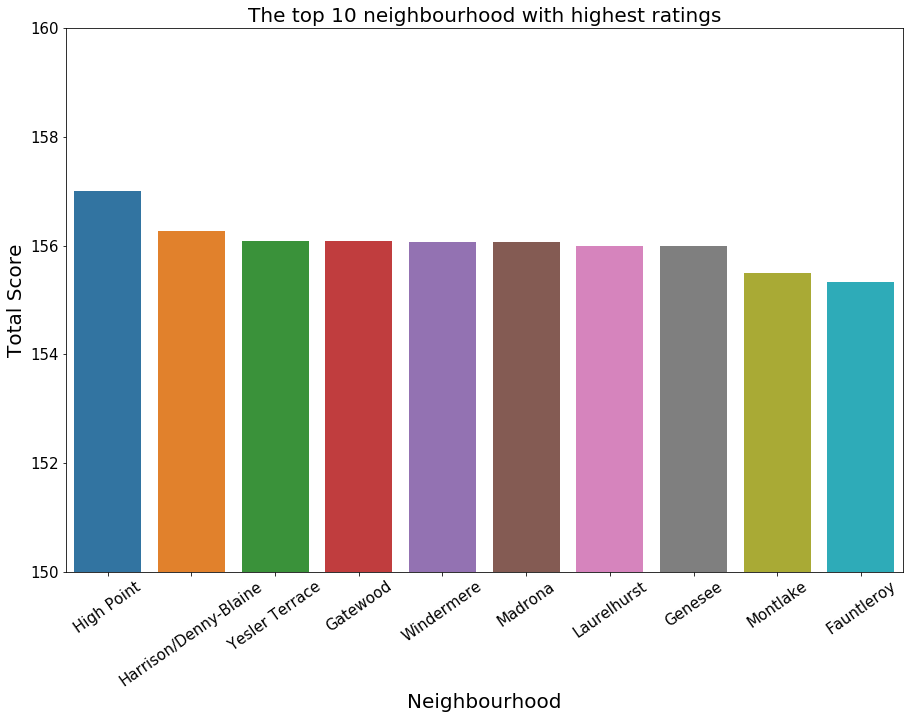

In [51]:
#Bar plot
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(N_plot.index, N_plot.total_score)
ax.set_ylim(150, 160)
ax.set_ylabel('Total Score', weight='normal', size=20)
ax.set_xlabel('Neighbourhood', weight='normal', size=20)
plt.title('The top 10 neighbourhood with highest ratings', size=20, weight='normal')
ax.tick_params('x', labelsize=15, labelrotation=35)
ax.tick_params('y', labelsize=15)